In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as scsp
#from scipy.special import lambertw
from scipy.integrate import odeint
from IPython.display import display, Math
import sympy as sp
import matplotlib as mpl
plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
sp.init_printing()
μ,ξ,w,d,k,t,x,y,p,m,v,q,r,s,z = sp.symbols('μ,ξ,w,d,k,t,x,y,p,m,v,q,r,s,z')
def prepend_latex(letex_str,sympy_expr): return Math(letex_str+sp.latex(sympy_expr))

**These notes aim to derive the stochastic equations governing the spread of a disease through a heterogeneous population.**
##  Heterogeneity in getting infected

Let us consider a susceptible population where the logarithm of each individual’s susceptibility to the disease is represented as  
$$
\mathbf{y} = (y_1, y_2, \dots, y_n).
$$  
Here, $y_i$ denotes the logarithm of susceptibility for the $i$-th individual. The values $y_i$ are sampled from a normally distributed random variable, $Y \sim N(\mu, v)$, with mean $\mu$ and variance $v$.

In time  $\mathrm{d}t$ there are $\alpha\cdot n\, \mathrm{d}t$ interactions between susceptible and infected populations, where $\alpha$ - value proportional to the infected population size, and, at this stage, we don't care about it. As a result of the interaction with a small probability $p_i$ proportional to $\exp(y_i)$, the susceptible person is drawn to become infected 
$$
p_i=p(y_i \text{ is drawn in one interaction}) = \frac{1}{n}\exp(y_i) \, c,
$$  
where $c$ is a small constant, so the sum of the $p_i$ is less than 1. 

As a result, we obtain a small subsample 
$$
\Delta \mathbf{y} = (y_{i_1}, y_{i_2}, \dots, y_{i_{\tilde{k}}}).
$$  
For simplicity, let us relabel the elements in this subsample as $\Delta y_j$, such that  
$$
\Delta \mathbf{y} = (\Delta y_1, \Delta y_2, \dots, \Delta y_{\tilde{k}}).
$$  

**$k$ calculation**

Assuming $\alpha\cdot n\, \mathrm{d}t$ is quite large, we can calculate the expected value of $\tilde{k}$, the size of the subsample. In one draw attempt we get some element with probability $p=  \sum_{i=1}^n p_i.$ Letting $p<<1$, we get the Poisson distribution with expectation and variance
$$
k =\alpha n\,\mathrm{d}t\, p=\alpha  n \,\mathrm{d}t\sum_{i=1}^n p_i =\alpha n \left(\frac{1}{n} \sum_{i=1}^n \exp(y_i)\right) \, c \, \mathrm{d}t =\alpha n \, \overline{\exp(\mathbf{y})} \, c \, \mathrm{d}t.
$$  

Because we don't care about $\alpha$ and $c$, let's push  $\alpha$ into $c$, so now and below, "new" $c$ is $\alpha c$ (and $c$ is now proportional to the infected population). What is important is that _we want $c$ to be independent from parameters $\mu,v$_. In new terms

$$
k = n \, \overline{\exp(\mathbf{y})} \, c \, \mathrm{d}t.
$$  

For large sample sizes, the sample mean $\overline{\exp(\mathbf{y})}$ converges to the expected value of the distribution from which the sample is drawn. Therefore, we replace $\overline{\exp(\mathbf{y})}$ with $\mathbb{E}[\exp(Y)]$, leading to:  
$$
k = n \, \mathbb{E}[e^Y] \, c \, \mathrm{d}t.
$$  

Let $\mathcal{M}(z) := \mathbb{E}[e^{zY}]$ represents the [moment-generating function (MGF)](https://en.wikipedia.org/wiki/Moment-generating_function)
of $Y$, which is given by:  

In [3]:
prepend_latex('\mathcal{M}(z)=',sp.exp(z*μ + z**2*v/2))

<IPython.core.display.Math object>

Define:  
$$
M(i, x) \coloneqq \frac{\mathrm{d}^i \mathcal{M}(z)}{\mathrm{d}z^i} \bigg|_{z = x},
$$  
note:
$$M(i, x) =\mathbb{E}[Y^i\exp(xY)].$$ 



In [4]:
def M(i,x):
    μ,v,z = sp.symbols('μ,v,z')
    return sp.diff(sp.exp(z*μ + z**2*v/2),z,i).subs(z,x)

We will use $M$ without arguments to refer specifically to $M(0, 1):=\mathcal{M}(1)$. Finally:  
$$
k = n \, \mathbb{E}[e^Y] \, c \, \mathrm{d}t = n \, \mathcal{M}_Y(1) \, c \, \mathrm{d}t =n \, M \, c \, \mathrm{d}t,
$$
or
$$
\frac{k}{n}= M \, c \, \mathrm{d}t.
$$

**Our next goal is to calculate the difference:**  
$$
\mathrm{d}\mu = \overline{\mathbf{y} \setminus \Delta \mathbf{y}} - \overline{\mathbf{y}},
$$  
where $\mathbf{y} \setminus \Delta \mathbf{y}$ denotes the set $\mathbf{y}$ after removing the subsample $\Delta \mathbf{y}$.  

We can express the mean of the remaining set as:  
$$
\overline{\mathbf{y} \setminus \Delta \mathbf{y}} = \frac{1}{n-k} \left(\sum_{\mathbf{y}} y_i - \sum_{\Delta \mathbf{y}} \Delta y_i\right).
$$  
Rewriting this in terms of averages:  
$$
\overline{\mathbf{y} \setminus \Delta \mathbf{y}} = \frac{n}{n-k} \left(\frac{1}{n} \sum_{\mathbf{y}} y_i - \frac{k}{n} \frac{1}{k} \sum_{\Delta \mathbf{y}} \Delta y_i\right) = \frac{1}{1 - \frac{k}{n}} \left(\overline{\mathbf{y}} - \frac{k}{n} \overline{\Delta \mathbf{y}}\right).
$$  

For small $\frac{k}{n}$, and neglecting terms of second or higher order in $\frac{k}{n}$, we approximate:  
$$
\overline{\mathbf{y} \setminus \Delta \mathbf{y}} \approx \left(1 + \frac{k}{n}\right)\left(\overline{\mathbf{y}} - \frac{k}{n} \overline{\Delta \mathbf{y}}\right) \approx \overline{\mathbf{y}} + \frac{k}{n} \left(\overline{\mathbf{y}} - \overline{\Delta \mathbf{y}}\right).
$$  

Thus, the difference becomes:  
$$
\mathrm{d}\mu = \frac{k}{n} \left(\overline{\mathbf{y}} - \overline{\Delta \mathbf{y}}\right).
$$


Let's find $\mathbb{E}[\mathrm{d}\mu]$.
$$\mathbb{E}[\mathrm{d}\mu]= \frac{k}{n} \left(\mathbb{E}[\overline{\mathbf{y}}] - \mathbb{E}[\overline{\Delta \mathbf{y}}]\right)$$
The first term in the brackets is $\mu$ and
$$ \mathbb{E}[\overline{\Delta \mathbf{y}}]=\mathbb{E}\left[\frac{1}{k} \sum_{\Delta \mathbf{y}} \Delta y_i\right]=\frac{1}{k} \sum_{\Delta \mathbf{y}} \mathbb{E}[\Delta y_i]=\mathbb{E}[\Delta y_i]$$
$$\mathbb{E}[\Delta y_i]=\frac{\sum_{\mathbf{y}}y_j\exp(y_j)}{\sum_{\mathbf{y}}\exp(y_j)}=\frac{\overline{\mathbf{y}\exp(\mathbf{y})}}{\overline{\exp(\mathbf{y})}} \approx \frac{\mathbb{E}[Y\exp(Y)]}{\mathbb{E}[\exp(Y)]}=\frac{M(1,1)}{M}$$


In [5]:
prepend_latex('\mathbb{E}[\Delta y_i]=\mathbb{E}[\overline{\Delta \mathbf{y}}]=',sp.simplify(M(1,1)/M(0,1)))

<IPython.core.display.Math object>

As a result
$$\mathbb{E}[\mathrm{d}\mu]= \frac{k}{n}(\mu - (\mu+v))=-\frac{k}{n}v$$

**Next we try to find $\operatorname{Var}[\mathrm{d}\mu]$. For the beginning, suppose k is fixed.**
$$\operatorname{Var}[\mathrm{d}\mu]=\frac{k^2}{n^2}\operatorname{Var}[\overline{\mathbf{y}}
- \overline{\Delta \mathbf{y}}]=\frac{k^2}{n^2} \operatorname{Var}[\overline{\Delta \mathbf{y}}]$$

Because we consider $\mathbf{y}$ as fixed too. 
$$\operatorname{Var}[\overline{\Delta \mathbf{y}}]=\frac{1}{k}\operatorname{Var}[\Delta y_j]$$
As a result
$$\operatorname{Var}[\mathrm{d}\mu]=\frac{1}{n}\frac{k}{n}\operatorname{Var}[\Delta y_j]$$
It's time to find $\operatorname{Var}[\Delta y_j]$
$$\operatorname{Var}[\Delta y_j]=\mathbb{E}[\Delta y_j^2]-\mathbb{E}[\Delta y_j]^2$$
$$ \mathbb{E}[\Delta y_j^2] = \sum_{\mathbf{y}}\frac{\exp(y_i)}{\sum_{\mathbf{y}}\exp(y_l)} y_i^2=\frac{\sum_{\mathbf{y}} y_i^2\exp(y_i)}{\sum_{\mathbf{y}}\exp(y_i)}\approx \frac{ \mathbb{E}[Y^2\exp(Y)]}{\mathbb{E}[\exp(Y)]}=\frac{M(2,1)}{M}$$

In [6]:
prepend_latex('\mathbb{E}[\Delta y_j^2]=',sp.simplify(M(2,1)/M(0,1)))

<IPython.core.display.Math object>

$$ \operatorname{Var}[\Delta y_j]=v + (v + μ)^{2}-(v+\mu)^2=v$$
$$\operatorname{Var}[\mathrm{d}\mu]=\frac{1}{n}\frac{k}{n}v$$

**Now let's lift the constrains on $k$**

Now $k$ is not fixed and distributed according to Poisson distribution. We denote it as $\tilde{k}$. So $\tilde{k} \sim \operatorname {Pois} (k)$, wher $k=\mathbb{E}[\tilde{k}]=\operatorname{Var}[\tilde{k}]=n M  c\,  \mathrm{d}t$

$$\operatorname{Var}[\mathrm{d}\mu]= \operatorname{Var}\left[\frac{\tilde{k}}{n}(\overline{\mathbf{y}}-\overline{\Delta \mathbf{y}})\right]=\frac{1}{n^2}\operatorname{Var}[\tilde{k}(\mu-\overline{\Delta \mathbf{y}})]$$

Because $(\mu-\overline{\Delta \mathbf{y}})$ is independent of $\tilde{k}$, we can apply the formula for independent random variables:
$$\operatorname{Var}[XY]=\operatorname{Var}[X]\cdot \mathbb{E}[Y]^{2}+\mathbb{E}[X]^{2}\cdot \operatorname{Var}[Y]+\operatorname{Var} [X]\cdot \operatorname{Var}[Y]$$



That way 
$$\operatorname{Var}[\tilde{k}(\mu-\overline{\Delta \mathbf{y}})] =
\operatorname{Var}[\tilde{k}]\mathbb{E}[\mu-\overline{\Delta \mathbf{y}}]^2+
\mathbb{E}[\tilde{k}]^2\operatorname{Var}[\overline{\Delta \mathbf{y}}]+
\operatorname{Var}[\tilde{k}]\operatorname{Var}[\overline{\Delta \mathbf{y}}]
=k(\mu-(\mu+v))^2+k^2\frac{v}{k}+k\frac{v}{k}=kv^2+kv+v
$$

As we consider $k>>1$, we drop the last term. Finally
$$\operatorname{Var}[\mathrm{d}\mu]=\frac{1}{n}\frac{k}{n}(v+1)v=\frac{1}{n}(v+1)v M c\,\mathrm{d}t$$









The independence of $(\mu-\overline{\Delta \mathbf{y}})$ and $\tilde{k}$ means that if we are thinking of stochastic differential equations describing the dynamics of $\mathrm{d}\mu$ (among the others), it needs two independent Brownian noises -- $W_k$ and $W_{\mu}$ with variances $\frac{1}{n}v^2 M c$ and $\frac{1}{n}v M c$ respectively, and looks like
$$\mathrm{d}\mu=-v M c\,\mathrm{d}t+\sqrt{\frac{1}{n}v^2 M c}\,\mathrm{d}W_k+\sqrt{\frac{1}{n}v M c}\,\mathrm{d}W_{\mu}$$

All the arguments above are valid if we consider $\mathrm{d} m_p$ - changes p-th raw moment instead of $\mathrm{d}\mu=\mathrm{d} m_1$. Let's briefly repeat the key points.
$$
\mathrm{d}m_p \coloneqq \overline{(\mathbf{y} \setminus \Delta \mathbf{y})^p} - \overline{\mathbf{y}^p},
$$  
where $\mathbf{y}^p=(y_1^p,y_2^p,\cdots,y_n^p)$
$$\mathrm{d}m_p = \frac{k}{n} \left(\overline{\mathbf{y}^p} - \overline{\Delta \mathbf{y}^p}\right)$$

$$\mathbb{E}[\overline{\Delta \mathbf{y}^p}]=\mathbb{E}[\Delta y_i^p]=\frac{M(p,1)}{M}$$
From properties of MGF $m_p=M(p,0)$, so
$$\mathbb{E}[\mathrm{d}m_p]= \frac{k}{n}\left(M(p,0) - \frac{M(p,1)}{M}\right)=\left(M(p,0) - \frac{M(p,1)}{M}\right)M c\,\mathrm{d}t$$

$$\operatorname{Var}[\mathrm{d}m_p]= \operatorname{Var}\left[\frac{\tilde{k}}{n}(\overline{\mathbf{y}^p}-\overline{\Delta \mathbf{y}^p})\right]=\frac{1}{n^2}\operatorname{Var}[\tilde{k}(M(p,0)-\overline{\Delta \mathbf{y}^p})]$$

$$\operatorname{Var}[M(p,0)-\overline{\Delta \mathbf{y}^p}]=\operatorname{Var}[\overline{\Delta \mathbf{y}^p}]=\frac{1}{k}\operatorname{Var}[\Delta y_j^p]$$
$$\operatorname{Var}[\Delta y_j^p]=\mathbb{E}[\Delta y_j^{2p}]-\mathbb{E}[\Delta y_j^p]^2=\frac{M(2p,1)}{M}-\frac{M(p,1)^2}{M^2}$$

$$\operatorname{Var}[\tilde{k}(M(p,0)-\overline{\Delta \mathbf{y}})] =
\operatorname{Var}[\tilde{k}]\mathbb{E}[M(p,0)-\overline{\Delta \mathbf{y}^p}]^2+
\mathbb{E}[\tilde{k}]^2\operatorname{Var}[\overline{\Delta \mathbf{y}^p}]+
\operatorname{Var}[\tilde{k}]\operatorname{Var}[\overline{\Delta \mathbf{y}^p}]$$
$$=k\left(M(p,0)-\frac{M(p,1)}{M}\right)^2+k\left(\frac{M(2p,1)}{M}-\frac{M(p,1)^2}{M^2}\right)+\left(\frac{M(2p,1)}{M}-\frac{M(p,1)^2}{M^2}\right)
$$



We omit the last term for the same reasons as before and finally get
$$\operatorname{Var}[\mathrm{d}m_p]=\frac{1}{n}\frac{k}{n}\left(\left(M(p,0)-\frac{M(p,1)}{M}\right)^2+\left(\frac{M(2p,1)}{M}-\frac{M(p,1)^2}{M^2}\right)\right)=\frac{1}{n}\left(\left(M(p,0)-\frac{M(p,1)}{M}\right)^2+\left(\frac{M(2p,1)}{M}-\frac{M(p,1)^2}{M^2}\right)\right) M c\,\mathrm{d}t$$

To obtain the final formulas we will need sympy help:

In [7]:
def E_term(p):
    return sp.simplify(M(p,0)-M(p,1)/M(0,1))
def Var_Wmu_term(p):
    return sp.simplify(M(2*p,1)/M(0,1)-(M(p,1)/M(0,1))**2)
def TotalVariance(p):
    return Math("\operatorname{Var}[\mathrm{d}m_"+str(p)+"]=\\frac{1}{n}\\frac{k}{n}\left("+sp.latex(E_term(p)**2+Var_Wmu_term(p))+"\\right)")
def Equation(p):
    return Math("\mathrm{d}m_"+str(p)+"=\left("+sp.latex(E_term(p))+
                "\\right)M c\,\mathrm{d}t+\sqrt{\\frac{M c}{n}}\left("+sp.latex(E_term(p))+"\\right)\mathrm{d}W_k+"+
                   "\sqrt{\\frac{M c}{n}}\sqrt{"+sp.latex(Var_Wmu_term(p))+"}\,\mathrm{d}W_{\mu}")


In [8]:
TotalVariance(2)

<IPython.core.display.Math object>

In [9]:
Equation(2)

<IPython.core.display.Math object>

Let's make a computational test. The following functions need to get roughly $k$ variants of choosing  $\Delta \mathrm{y}$ from an  $n=k*k$ size population, with each of the variant sizes roughly $k$.

In [10]:
def get_dm_pfun(k,v,mu=None,fixed_k=False):#k - average subsample size
    if mu==None:mu=-0.5*v
    n,s=k*k,k*k #n - population size, s - sum of subsample sizes, it will be roughly s/k subsamples
    susceptability_log=np.random.normal(mu,np.sqrt(v),size=n)
    susceptability_cs=np.cumsum(np.exp(susceptability_log))
    subsamples=susceptability_log[np.searchsorted(susceptability_cs,np.random.rand(s)*susceptability_cs[-1])] #all the subsamples
    if fixed_k:
        k_arr=np.ones(int(s/k)+1,dtype=int)*k
    else:
        k_arr=np.random.poisson(k, int(s/k)+10) #array of subsamles sizes
    bounds=np.cumsum(k_arr)#bounds of individual subsamples i.e. first subsumple is subsamples[0,bounds[0]],... 
    top_bound=np.searchsorted(bounds,s-1)-1 #bound on sum of subsample sizes
    def res(p=1):#p - order of the raw moment, function returns dm_p 
        population_p_mean=np.mean(np.power(susceptability_log,p))
        sums=np.diff(np.cumsum(np.power(subsamples,p))[bounds[:top_bound]],1,prepend=0.0) #summing values inside each of the subsumples
        return (population_p_mean*k_arr[:top_bound]-sums)/n
    return res #returns function (closure) so we can get different moments for the same settings 
 

After that we can calculate p-th moments and their sample mean and variance and divide it by values calculated by our formulas. We should get something around 1.

In [11]:
k=2000
moment_order = 3
μ,v = sp.symbols('μ,v')
E_denom_func=sp.lambdify((μ,v),E_term(moment_order))
Var_denom_func=sp.lambdify((μ,v),E_term(moment_order)**2+Var_Wmu_term(moment_order))
mu=0.1
for v in 0.2*np.arange(10)+0.2:
    d_m_pfun=get_dm_pfun(k,v,mu)
    d_m=d_m_pfun(moment_order)
    print([np.mean(d_m)*k/E_denom_func(mu,v),np.var(d_m,ddof=1)*k*k*k/Var_denom_func(mu,v)])

[0.9977530218218735, 1.023111541663745]
[1.0028114572327924, 0.9709809068306802]
[1.0000706029928783, 0.9811004278610954]
[1.006176354376491, 0.9631020450053605]
[0.9988160486502164, 1.0144081690584617]
[1.008254566303617, 1.0325188382245032]
[0.9969110277963842, 0.9734758397925722]
[0.9979827289063373, 0.988597769046455]
[0.9938361735031536, 0.9552387724751508]
[0.9870561536928013, 0.8798510815875089]


**Let's calculate the change in the susceptible population variance.**
$$
\mathrm{d}v \coloneqq \operatorname{SVar}[\mathbf{y} \setminus \Delta \mathbf{y}] - \operatorname{SVar}[\mathbf{y}],
$$ 
where $\operatorname{SVar}[\mathbf{y}] \coloneqq\overline{\mathbf{y}^2}-\overline{\mathbf{y}}^2$ - the sample variance. So

$$
\mathrm{d}v = \overline{\left(\mathbf{y} \setminus \Delta \mathbf{y}\right)^2} - \overline{\left(\mathbf{y} \setminus \Delta \mathbf{y}\right)}^2 -\overline{\mathbf{y}^2}+\overline{\mathbf{y}}^2=\mathrm{d}m_2-(\overline{\left(\mathbf{y} \setminus \Delta \mathbf{y}\right)}^2-\overline{\mathbf{y}}^2)
$$ 

$$
\overline{\left(\mathbf{y} \setminus \Delta \mathbf{y}\right)}^2-\overline{\mathbf{y}}^2=
\overline{(\overline{\mathbf{y}}+\mathrm{d}\mu)}^2 - \overline{\mathbf{y}}^2= (\mu+\mathrm{d}\mu)^2-\mu^2
$$
Omitting $\mathrm{d}\mu^2$, we get
$$
\mathrm{d}v=\mathrm{d}m_2 -2\mu\mathrm{d}\mu
$$
and
$$
\mathbb{E}[\mathrm{d}v]=\mathbb{E}[\mathrm{d}m_2]-2\mu\mathbb{E}[\mathrm{d}\mu]=\frac{k}{n}(\mu^{2} - (v + \mu)^{2}+2\mu v)=-\frac{k}{n}v^2
$$



$$
\operatorname{Var}[\mathrm{d}v]=\operatorname{Var}\left[\frac{\tilde{k}}{n}\left((\overline{\mathbf{y}^2}-\overline{\Delta \mathbf{y}^2})
-2\mu(\overline{\mathbf{y}}-\overline{\Delta \mathbf{y}})\right) \right]=\operatorname{Var}\left[\frac{\tilde{k}}{n}(v+\mu^2 -\overline{\Delta \mathbf{y}^2}-2\mu^2+2\mu\overline{\Delta \mathbf{y}}) \right]=\frac{1}{n^2}\operatorname{Var}\left[\tilde{k}\left(v-\mu^2 -(\overline{\Delta \mathbf{y}^2-2\mu\Delta \mathbf{y}})\right) \right]
$$

$$
\operatorname{Var}\left[v-\mu^2 -(\overline{\Delta \mathbf{y}^2-2\mu\Delta \mathbf{y}})\right]=\operatorname{Var}\left[\overline{\Delta \mathbf{y}^2-4\mu\Delta \mathbf{y}} \right]=\frac{1}{k}\operatorname{Var}[\Delta y_j^2-2\mu \Delta y_j]
$$

$$
\operatorname{Var}[\Delta y_j^2-2\mu\Delta y_j]=\operatorname{Var}[\Delta y_j^2]-4\mu\operatorname{Cov}[\Delta y_j^2,2\mu \Delta y_j] +4\mu^2\operatorname{Var}[\Delta y_j]
$$
Let's find the covariance of one of the subsamples with its square, namely $\Delta y_j$ and $\Delta y_j^2$ 

$$
\operatorname{Cov}[\Delta y_j^2,\Delta y_j]=
\mathbb{E}[\Delta y_i^3] -\mathbb{E}[\Delta y_i] \mathbb{E}[\Delta y_i^2]=\frac{M(3,1)M-M(1,1)M(2,1)}{M^2}
$$
and, by the way
$$\operatorname{Cov}[\Delta y_j^p,\Delta y_j^q]=\frac{M(p+q,1)M-M(p,1)M(q,1)}{M^2}$$

recalling

$$\operatorname{Var}[\Delta y_j^p]=\operatorname{Cov}[\Delta y_j^p,\Delta y_j^p]=\frac{M(2p,1)M-M(p,1)^2}{M^2}$$


In [12]:
def Cov(p,q):
    return sp.simplify((M(p+q,1)*M(0,1)-M(p,1)*M(q,1))/M(0,1)**2)

In [13]:
prepend_latex("\operatorname{Var}[\Delta y_j^2-2\mu\Delta y_j]=",sp.simplify(Cov(2,2)-4*μ*Cov(2,1)+4*μ**2*Cov(1,1)))

<IPython.core.display.Math object>

According to the formula for independent variables variance
$$\operatorname{Var}[\tilde{k}(v-\mu^2 -(\overline{\Delta \mathbf{y}^2-2\mu\Delta \mathbf{y}}))] =
\operatorname{Var}[\tilde{k}]\mathbb{E}[v-\mu^2-(\overline{\Delta \mathbf{y}^2-2\mu\Delta \mathbf{y}})]^2+
\mathbb{E}[\tilde{k}]^2\operatorname{Var}[\overline{\Delta \mathbf{y}^2-2\mu\Delta \mathbf{y}}]+
\operatorname{Var}[\tilde{k}]\operatorname{Var}[\overline{\Delta \mathbf{y}^2-2\mu\Delta \mathbf{y}}]$$
$$=k v^4+k(4v+2)v^2+(4v+2)v^2
$$

Omitting the last term, as always, we get
$$\operatorname{Var}[\mathrm{d}v]=\frac{1}{n}\frac{k}{n} (v^4+(4v+2)v^2)$$

$$
\mathrm{d}v=-v^2 M c\,\mathrm{d}t+\sqrt{\frac{M c}{n}}v^2\mathrm{d}W_k+\sqrt{\frac{M(4v+2)c}{n}}v\,\mathrm{d}W_v
$$

Get the formula—test the formula:

In [14]:
k=2000
μ,v = sp.symbols('μ,v')
mu=0.7
for v in 0.2*np.arange(10)+0.2:
    d_m_pfun=get_dm_pfun(k,v,mu)
    dv=d_m_pfun(2)-2*mu*d_m_pfun(1)
    print(np.var(dv,ddof=1)*k*k*k/(v**2*(v**2+4*v+2)))

1.03413283904463
1.018701917875257
1.005069602046329
1.0415553272170248
1.001424898996674
0.9355358932051501
0.9385800876163445
0.9782651711714433
0.9822634599057387
1.0322563353015852


Also we need a covariance of the noises associated with $W_{\mu}$ and $W_v$ namely covariance of
$$\frac{k}{n} \left(\mu - \overline{\Delta \mathbf{y}}\right)$$
and
$$
\frac{k}{n}\left(v-\mu^2 -(\overline{\Delta \mathbf{y}^2-2\mu\Delta \mathbf{y}})\right)
$$
Here $k$ is constant.
$$
\operatorname{Cov}\left[\frac{k}{n} \left(\mu - \overline{\Delta \mathbf{y}}\right),\frac{k}{n}\left(v-\mu^2 -(\overline{\Delta \mathbf{y}^2-2\mu\Delta \mathbf{y}})\right)\right]
=\frac{k^2}{n^2}\operatorname{Cov}\left[\overline{\Delta \mathbf{y}},\overline{\Delta \mathbf{y}^2-2\mu\Delta \mathbf{y}}\right]
$$

$$
=\frac{k^2}{n^2}\left(\operatorname{Cov}\left[\overline{\Delta \mathbf{y}},\overline{\Delta \mathbf{y}^2}\right]-2\mu\operatorname{Var}[\overline{\Delta \mathbf{y}}]\right)
=\frac{k}{n^2}\left(\operatorname{Cov}\left[\Delta y_j,\Delta y_j^2\right]-2\mu v\right)
=\frac{2}{n}\frac{k}{n}v^2
$$
And correlation coefficient is
$$
r=\frac{2v^2}{\sqrt{v^3(4v+2)}}=\frac{v}{\sqrt{v^2+v/2}}
$$

In [15]:
prepend_latex("\operatorname{Cov}[\Delta y_j,\Delta y_j^2]=",sp.simplify(Cov(1,2)))

<IPython.core.display.Math object>

In [16]:
def cov(x,y):
    return 0.5*(np.var(x+y,ddof=1)-np.var(x,ddof=1)-np.var(y,ddof=1))
k=2000
μ,v = sp.symbols('μ,v')
mu=0.7
for v in 0.2*np.arange(10)+0.2:
    d_m_pfun=get_dm_pfun(k,v,mu,True)
    dmu=d_m_pfun(1)
    dv=d_m_pfun(2)-2*mu*dmu
    print(cov(dmu,dv)*k*k*k/2/v**2)



0.9555897677725984
0.995575704917768
0.9876783311134341
1.0406218945615275
1.0095805534709943
0.995146080265784
1.040915526091803
0.9724135286407537
0.9705004663796253
0.9669185050875257


Let's repeat the SIR model with heterogenity of getting infected (HC SIR). HC SIR model heterogenity is described by lognormal distribution with initial (logarithmic) variance parameter $v_0$. HC SIR equations are
$$\begin{align}
& \frac{d S}{dt}=- M \cdot I\cdot S, \\[3pt]
& \frac{dI}{dt} =- \frac{dS}{dt}- I,\\[3pt]
& \frac{d\mu}{dt}=- M\cdot I\cdot v, \\[3pt]
& \frac{d v}{dt}=-M\cdot I\cdot v^2, \\[3pt]
& M= \exp(\mu+\frac{v}{2}), \\[3pt]
&R = 1-S-I
\end{align}$$
$$I(0)=I_0,\:S(0)=1-I_0,\:\mu(0)=\ln(r_0)-v_0/2,\:v(0)=v_0$$ 

Here the (city) population being normalized to 1. 

$S$ - The proportion of the of susceptible population

$I$ - The proportion of the of infectious population

$R$ - The proportion of the of removed (and immune) or deceased population

Let $N$ is the actual population size. The first equation can be rewritten as
$$N\mathrm{d} S =- M \cdot I\cdot S \cdot N \mathrm{d}t$$

But $N\mathrm{d} S$ is the number of incidence $k$ and $S\cdot N$ is $n$ -- susceptible population size. So
$$\frac{k}{n}=M\cdot I \mathrm{d}t$$
compare with 
$$
\frac{k}{n}= M \, c \, \mathrm{d}t.
$$
we conclude that $I$ is exactly the same constant $c$ that we didn't care about before, and now its time has come. 

Our first stochastic equation become
$$N\mathrm{d} S =- M \cdot I\cdot S \cdot N \mathrm{d}t +\sqrt{M \cdot I\cdot S \cdot N}\mathrm{d}W_k$$
dividing both parts by $N$ we get
$$\mathrm{d} S =- M \cdot I\cdot S \mathrm{d}t +\sqrt{\frac{M \cdot I\cdot S}{N}}\mathrm{d}W_k$$
$$\mathrm{d} I =(M \cdot I\cdot S - I)\mathrm{d}t -\sqrt{\frac{M \cdot I\cdot S}{N}}\mathrm{d}W_k + \sqrt{\frac{I}{N}}\mathrm{d}W_I$$
$$ \mathrm{d} \mu = - v\,M\cdot I\,\mathrm{d}t +v\sqrt{\frac{M \cdot I}{N\cdot S}}\,\mathrm{d}W_k+\sqrt{\frac{v\,M \cdot I}{N\cdot S}}\,\mathrm{d}W_{\mu}$$
$$
\mathrm{d}v=-v^2\,M\cdot I\,\mathrm{d}t+v^2\sqrt{\frac{M \cdot I}{N\cdot S}}\mathrm{d}W_k+v\sqrt{\frac{M(4v+2)I}{N\cdot S}}\mathrm{d}W_{v}
$$

## Heterogeneity in spreading the disease

Stopped here -------------------------------------------------


Let's look at some transforms
$$\mathrm{d} \frac{1}{v} = (M \cdot I +v\frac{M \cdot I}{N\cdot S} + \frac{(4v+2)M \cdot I}{v\,N\cdot S})\mathrm{d}t - \sqrt{\frac{M \cdot I}{N\cdot S}}\mathrm{d}W_k-\sqrt{\frac{M(4v+2)I}{v^2\,N\cdot S}}\mathrm{d}W_{v}$$
$$\mathrm{d} ln(S) =- (M \cdot I+\frac{1}{2}\frac{M \cdot I}{N\cdot S}) \mathrm{d}t +\sqrt{\frac{M \cdot I}{N\cdot S}}\mathrm{d}W_k$$
$$\mathrm{d} (S+I) = - I\mathrm{d}t + \sqrt{\frac{I}{N}}\mathrm{d}W_I$$


$$\mathrm{d} ln(v) = -(v\,M \cdot I +\frac{1}{2}v^3\frac{M \cdot I}{N\cdot S} + \frac{1}{2}\frac{v(4v+2)M \cdot I}{N\cdot S})\mathrm{d}t + v\sqrt{\frac{M \cdot I}{N\cdot S}}\mathrm{d}W_k+\sqrt{\frac{M(4v+2)I}{N\cdot S}}\mathrm{d}W_{v}$$

--------------------------------------------------------------
-----------------------------------------------------------



In [17]:
modeling_period=8.0
t_step=0.005
m_t=np.arange(0.0, modeling_period+t_step, t_step,dtype=np.float64)
n_steps=len(m_t)-1


In [18]:
def HC_SIR(r0_0,I0,v0):
    '''
    Heterogeneous in Catching
    SIR model
    '''
    def ODE(y,t):
        S,I,mu,v=y

        minus_r0_mult_I=-np.exp(mu+0.5*v)*I

        dS = minus_r0_mult_I*S
        dI = -dS - I
        dmu = minus_r0_mult_I*v
        dv = dmu*v
        return [dS, dI, dmu, dv]
    
    y0=[1.0-I0,I0,np.log(r0_0)-0.5*v0,v0]
    
    sol = odeint(ODE,y0, m_t).T
    dS=-ODE(sol,m_t)[0]
    S,I,mu,v=sol
    R=1.0-S-I
    
    return S,I,R,dS

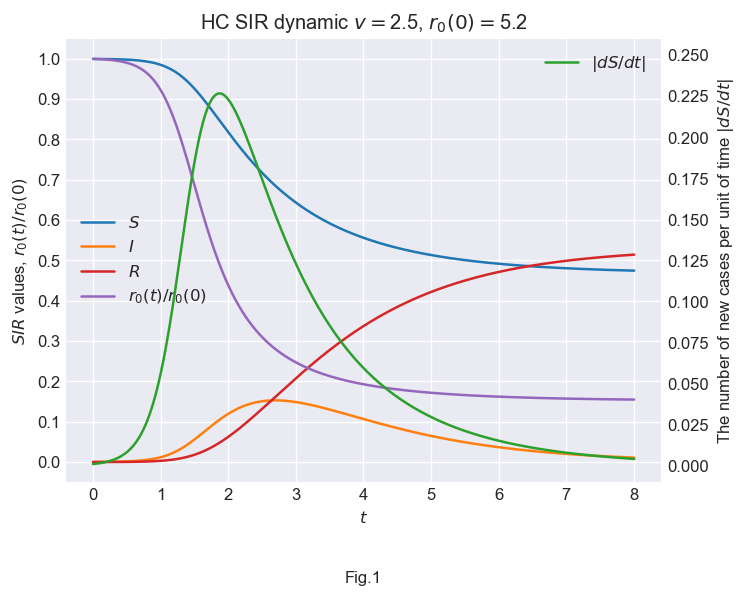

R+I at max |dS/dt| is 0.15277108265769057.


In [19]:
v0=2.5
r0_0=5.2
I0=0.0002
S,I,R,dS= HC_SIR(r0_0,I0,v0)

fig, ax = plt.subplots(dpi=120)
plt.plot(m_t, S, color='C0', label=f'$S$')
plt.plot(m_t, I,color='C1', label=f'$I$')
plt.plot(m_t, R,color='C3', label=f'$R$')
plt.plot(m_t, dS/(I*S)/r0_0,color='C4', label=f'$r_0(t)/r_0(0)$')
ax.set_ylim([-0.05,1.05])
ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.1))
ax.set_ylabel(f'$SIR$ values, $r_0(t)/r_0(0)$')
plt.legend(loc='center left')
plt.xlabel(f'$t$')
ax2 = ax.twinx()
plt.plot(m_t, dS, color='C2', label=f'$|dS/dt|$') 
ax2.set_ylim([-0.01,0.26])
ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.025))
ax2.grid(False)
ax2.set_ylabel(f'The number of new cases per unit of time $|dS/dt|$')
plt.legend(loc='upper right')
plt.title(f'HC SIR dynamic $v=${v0}, $r_0(0)=${r0_0}')
ax.text(4,-.3, 'Fig.1', ha='center')
plt.show() 
print(f'R+I at max |dS/dt| is {(R+I)[np.argmax(dS)]}.')

$$\mathrm{d} \frac{1}{v} = (M \cdot I +v\frac{M \cdot I}{N\cdot S} + \frac{(4v+2)M \cdot I}{v\,N\cdot S})\mathrm{d}t - \sqrt{\frac{M \cdot I}{N\cdot S}}\mathrm{d}W_k-\sqrt{\frac{M(4v+2)I}{v^2\,N\cdot S}}\mathrm{d}W_{\mu}$$

$$dX_t = a(X_t)\,dt + b(X_t)\,dB_t$$
$$dF(X_t) =
 \left[
  a(X_t) \frac{\partial F}{\partial x} +
  \frac{1}{2} b^2(X_t) \frac{\partial^2F}{\partial x^2}
 \right]\,dt +
 \frac{\partial F}{\partial x} b(X_t)\,dB_t.$$
$$F(X)=ln(X)$$